In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import sklearn
import pandas as pd
import numpy as np
import collections
from matplotlib import pyplot as plt
%matplotlib inline

In [20]:
profiles = pd.read_csv('profiles.csv')
scaler = StandardScaler()
print(profiles.head())
print(profiles.info())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

In [21]:
print(profiles['education'].value_counts())

education
graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
d

From these counts, it is clear that OKCupid has a large user base within graduated university students. This includes a significant number of people that continued their education and graduated from a masters degree program. This suggests a possible connection between education level and usage of OKCupid

In [22]:
#Gathering all profiles 'education' details
education = profiles['education']
#print(education.values)
#edu_labs= [profiles['education'].unique() for profiles['education'] in profiles['education']]
profiles['grad_type']=[0 if i=='graduated from college/university' or i == 'graduated from masters program' else 1 for i in profiles['education']]
print(profiles['grad_type'])

0        1
1        1
2        0
3        1
4        0
        ..
59941    0
59942    1
59943    0
59944    1
59945    0
Name: grad_type, Length: 59946, dtype: int64


In [23]:
drugs = profiles['drugs']
drugs.value_counts()



drugs
never        37724
sometimes     7732
often          410
Name: count, dtype: int64

This shows that the vast majority of profiles say they do not take drugs. This may be due to the profile owners not wanting to make it public that they use recreational drugs.

In [24]:

drugs = drugs.replace({
    'never':0,
    'sometimes':1,
    'often':2,
})
drugs= drugs.fillna(0)

In [25]:
print(drugs)

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
59941    0.0
59942    1.0
59943    0.0
59944    2.0
59945    0.0
Name: drugs, Length: 59946, dtype: float64


In [26]:
smokes = profiles[['smokes']]
smokes.value_counts()

smokes        
no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: count, dtype: int64

In [27]:
smokes = smokes.replace({
    'no':0,
    'sometimes':1,
    'when drinking':2,
    'yes':4,
    'trying to quit':3
})
smokes = smokes.fillna(0)

In [28]:
print(smokes)

       smokes
0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
...       ...
59941     0.0
59942     0.0
59943     0.0
59944     3.0
59945     1.0

[59946 rows x 1 columns]


In [29]:
drinks = profiles[['drinks']]
drinks.value_counts()

drinks     
socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: count, dtype: int64

This would suggest that most OkCupid users are very likely to drink if they are in a social setting, but not necessarily alone.

In [45]:
model = nn.Sequential(
    nn.Linear(41962,20981),
    nn.ReLU(),
    nn.Linear(20981,10490),
    nn.ReLU(),
    nn.Linear(10490,5245),
    nn.ReLU(),
    nn.Linear(5245,2622),
    nn.ReLU(),
    nn.Linear(2622, 1311),
    nn.ReLU(),
    nn.Linear(1311, 655),
    nn.ReLU(),
    nn.Linear(655, 1)
)
#print(smokes.value_counts().astype(np.float64))
#predictions = model()
smk_i =[]
for i in smokes:
    if i == 0:
        continue
    else:
        smokes[i].replace({
            i:1
        })
print(smokes.head())

   smokes
0     1.0
1     0.0
2     0.0
3     0.0
4     0.0


In [50]:
torch.manual_seed(13)

X= torch.tensor(smokes.values.astype(np.int32), dtype= torch.float64)
y= torch.tensor(profiles['grad_type'].values.astype(np.float64), dtype= torch.float64)
y.reshape(-1, 1)
print(len(y),len(X))


59946 59946


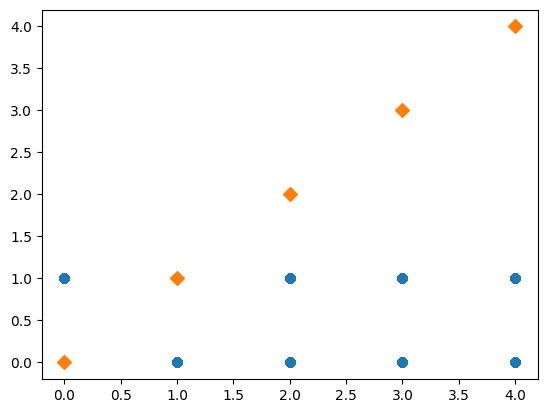

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 13)
scaler.fit_transform(X_train, y_train)
loss= nn.MSELoss()
#optimizer = optim.SGD(params= model.)

score_lst= []
i=[]
#

knclass = KMeans(n_clusters=5, random_state=13, n_init=10)
knclass.fit(X_train)
centroids = knclass.cluster_centers_
centroids_X = centroids[:,0]
centroids_y = centroids[:,-1]
labels=knclass.predict(X_train)
plt.scatter(X, y, alpha=0.6)
plt.scatter(centroids_X, centroids_y, marker='D', s=50)
plt.show()

In [42]:
print(knclass.score(X_test, y_test))
print(knclass.predict_proba(X_test))

0.5768460854092526
[[0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]
 ...
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]]


In [45]:
clf = MLPClassifier(random_state=13, max_iter = 3000).fit(X_train, y_train)

#for epoch in range(1000):
 #   predictions = clf.predict(X_test)
  #  MSE = loss(X_test, predictions) # compute loss
   # MSE.backward() # compute gradients
    #optimizer.step()
    #optimizer.zero_grad()
    #if epoch % 100 == 0:
        #print(f'Epoch is {epoch} loss is {MSE}')

TypeError: 'int' object is not callable